# Student Performance Analysis
Presented By: Mohamed Mahmoud

Data Source: https://www.kaggle.com/datasets/grandmaster07/student-exam-performance-dataset-analysis

## Importing the required libraries and dataset

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

data = pd.read_csv('StudentPerformanceFactors.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Exploring and Summarizing the Data

In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [301]:
data.shape

(6607, 20)

In [302]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [303]:
data.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [304]:
data.describe(include='all').round()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.0,6607.0,6607,6607,6607,6607.0,6607.0,6607,6607,6607.0,6607,6529,6607,6607,6607.0,6607,6517,6540,6607,6607.0
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,20.0,80.0,NaN,NaN,NaN,7.0,75.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,67.0
std,6.0,12.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4.0
min,1.0,60.0,NaN,NaN,NaN,4.0,50.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,55.0
25%,16.0,70.0,NaN,NaN,NaN,6.0,63.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,65.0
50%,20.0,80.0,NaN,NaN,NaN,7.0,75.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,67.0
75%,24.0,90.0,NaN,NaN,NaN,8.0,88.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,69.0


In [305]:
data.duplicated().sum()

np.int64(0)

## Handling Missing Values

In [306]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [307]:
data.dropna(inplace=True)

In [308]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Handling Outliers

In [309]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [310]:
cols = ['Attendance', 'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']
for col in cols:
    data = remove_outliers(data, col)

data['Exam_Score'] = data['Exam_Score'].clip(lower=0, upper=100)

## Feature Engineering

In [311]:
exam_score = data.pop("Exam_Score")
data.insert(0, "Exam_Score", exam_score)

data

,Exam_Score,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,67,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male
1,61,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female
2,74,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male
3,71,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male
4,70,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,68,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female
6603,69,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female
6604,68,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female
6605,68,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female


In [312]:
model_data = data.copy()

model_data = pd.get_dummies(model_data, columns=['Gender', 'School_Type', 'Internet_Access', 'Extracurricular_Activities', 'Learning_Disabilities'], drop_first=True)

le = LabelEncoder()
model_data['Gender_Male'] = le.fit_transform(model_data['Gender_Male'])
model_data['Extracurricular_Activities_Yes'] = le.fit_transform(model_data['Extracurricular_Activities_Yes'])
model_data['Internet_Access_Yes'] = le.fit_transform(model_data['Internet_Access_Yes'])
model_data['School_Type_Public'] = le.fit_transform(model_data['School_Type_Public'])
model_data['Internet_Access_Yes'] = le.fit_transform(model_data['Internet_Access_Yes'])
model_data['Learning_Disabilities_Yes'] = le.fit_transform(model_data['Learning_Disabilities_Yes'])

In [313]:
model_data

,Exam_Score,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Gender_Male,School_Type_Public,Internet_Access_Yes,Extracurricular_Activities_Yes,Learning_Disabilities_Yes
0,67,23,84,Low,High,7,73,Low,0,Low,Medium,Positive,3,High School,Near,1,1,1,0,0
1,61,19,64,Low,Medium,8,59,Low,2,Medium,Medium,Negative,4,College,Moderate,0,1,1,0,0
2,74,24,98,Medium,Medium,7,91,Medium,2,Medium,Medium,Neutral,4,Postgraduate,Near,1,1,1,1,0
3,71,29,89,Low,Medium,8,98,Medium,1,Medium,Medium,Negative,4,High School,Moderate,1,1,1,1,0
4,70,19,92,Medium,Medium,6,65,Medium,3,Medium,High,Neutral,4,College,Near,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,68,25,69,High,Medium,7,76,Medium,1,High,Medium,Positive,2,High School,Near,0,1,1,0,0
6603,69,23,76,High,Medium,8,81,Medium,3,Low,High,Positive,2,High School,Near,0,1,1,0,0
6604,68,20,90,Medium,Low,6,65,Low,3,Low,Medium,Negative,2,Postgraduate,Near,0,1,1,1,0
6605,68,10,86,High,High,6,91,High,2,Low,Medium,Positive,3,High School,Far,0,0,1,1,0


In [314]:
ordinal_mapping = {
    "Low": 0,
    "Medium": 1,
    "High": 2
}

ordinal_features = [
    "Parental_Involvement",
    "Access_to_Resources",
    "Motivation_Level",
    "Family_Income",
    "Teacher_Quality"
]

for col in ordinal_features:
    model_data[col] = model_data[col].map(ordinal_mapping)

model_data

,Exam_Score,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Gender_Male,School_Type_Public,Internet_Access_Yes,Extracurricular_Activities_Yes,Learning_Disabilities_Yes
0,67,23,84,0,2,7,73,0,0,0,1,Positive,3,High School,Near,1,1,1,0,0
1,61,19,64,0,1,8,59,0,2,1,1,Negative,4,College,Moderate,0,1,1,0,0
2,74,24,98,1,1,7,91,1,2,1,1,Neutral,4,Postgraduate,Near,1,1,1,1,0
3,71,29,89,0,1,8,98,1,1,1,1,Negative,4,High School,Moderate,1,1,1,1,0
4,70,19,92,1,1,6,65,1,3,1,2,Neutral,4,College,Near,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,68,25,69,2,1,7,76,1,1,2,1,Positive,2,High School,Near,0,1,1,0,0
6603,69,23,76,2,1,8,81,1,3,0,2,Positive,2,High School,Near,0,1,1,0,0
6604,68,20,90,1,0,6,65,0,3,0,1,Negative,2,Postgraduate,Near,0,1,1,1,0
6605,68,10,86,2,2,6,91,2,2,0,1,Positive,3,High School,Far,0,0,1,1,0


In [315]:
ordinal_mapping = {
    "Negative": 0,
    "Neutral": 1,
    "Positive": 2
}
model_data['Peer_Influence'] = model_data['Peer_Influence'].map(ordinal_mapping)

ordinal_mapping = {
    "High School": 0,
    "College": 1,
    "Postgraduate": 2
}
model_data['Parental_Education_Level'] = model_data['Parental_Education_Level'].map(ordinal_mapping)

ordinal_mapping = {
    "Near": 0,
    "Moderate": 1,
    "Far": 2
}
model_data['Distance_from_Home'] = model_data['Distance_from_Home'].map(ordinal_mapping)

In [316]:
model_data.dtypes

Exam_Score                        int64
Hours_Studied                     int64
Attendance                        int64
Parental_Involvement              int64
Access_to_Resources               int64
Sleep_Hours                       int64
Previous_Scores                   int64
Motivation_Level                  int64
Tutoring_Sessions                 int64
Family_Income                     int64
Teacher_Quality                   int64
Peer_Influence                    int64
Physical_Activity                 int64
Parental_Education_Level          int64
Distance_from_Home                int64
Gender_Male                       int64
School_Type_Public                int64
Internet_Access_Yes               int64
Extracurricular_Activities_Yes    int64
Learning_Disabilities_Yes         int64
dtype: object

In [317]:
model_data

,Exam_Score,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Gender_Male,School_Type_Public,Internet_Access_Yes,Extracurricular_Activities_Yes,Learning_Disabilities_Yes
0,67,23,84,0,2,7,73,0,0,0,1,2,3,0,0,1,1,1,0,0
1,61,19,64,0,1,8,59,0,2,1,1,0,4,1,1,0,1,1,0,0
2,74,24,98,1,1,7,91,1,2,1,1,1,4,2,0,1,1,1,1,0
3,71,29,89,0,1,8,98,1,1,1,1,0,4,0,1,1,1,1,1,0
4,70,19,92,1,1,6,65,1,3,1,2,1,4,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,68,25,69,2,1,7,76,1,1,2,1,2,2,0,0,0,1,1,0,0
6603,69,23,76,2,1,8,81,1,3,0,2,2,2,0,0,0,1,1,0,0
6604,68,20,90,1,0,6,65,0,3,0,1,0,2,2,0,0,1,1,1,0
6605,68,10,86,2,2,6,91,2,2,0,1,2,3,0,2,0,0,1,1,0


## Machine Learning Model

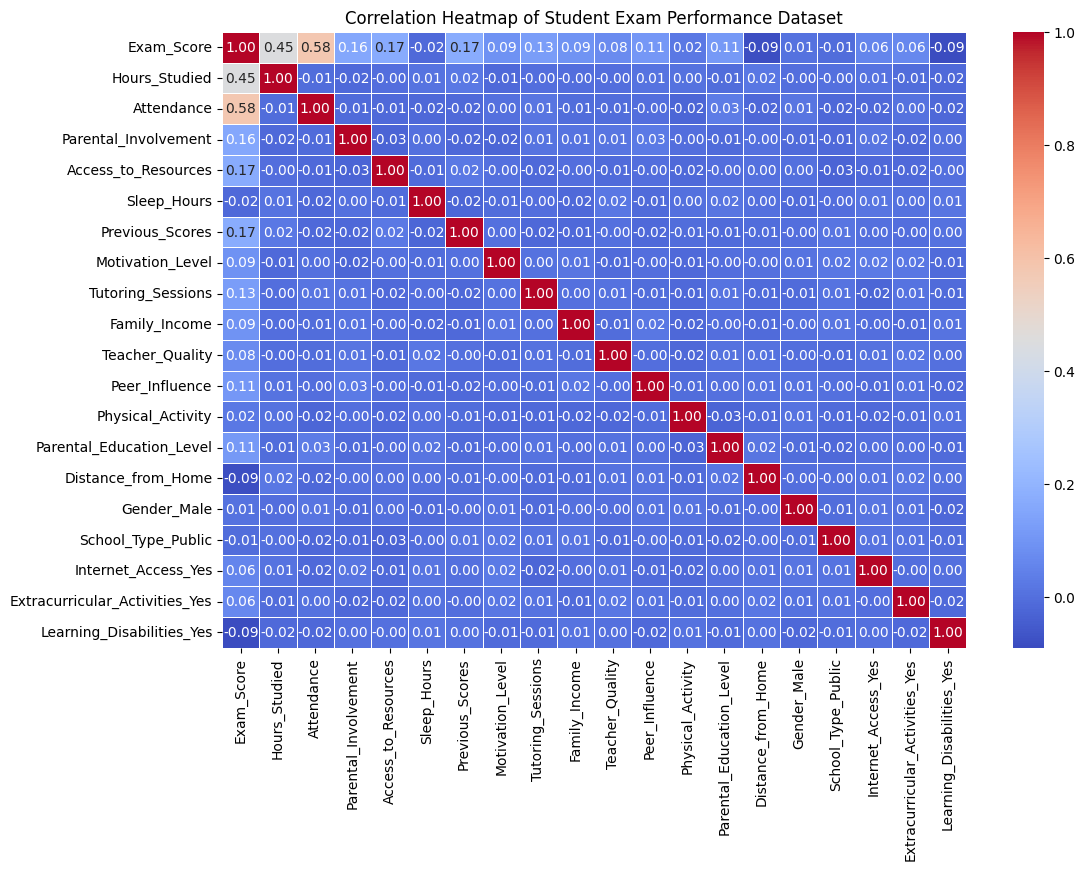

In [318]:
corr = model_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Student Exam Performance Dataset")
plt.show()

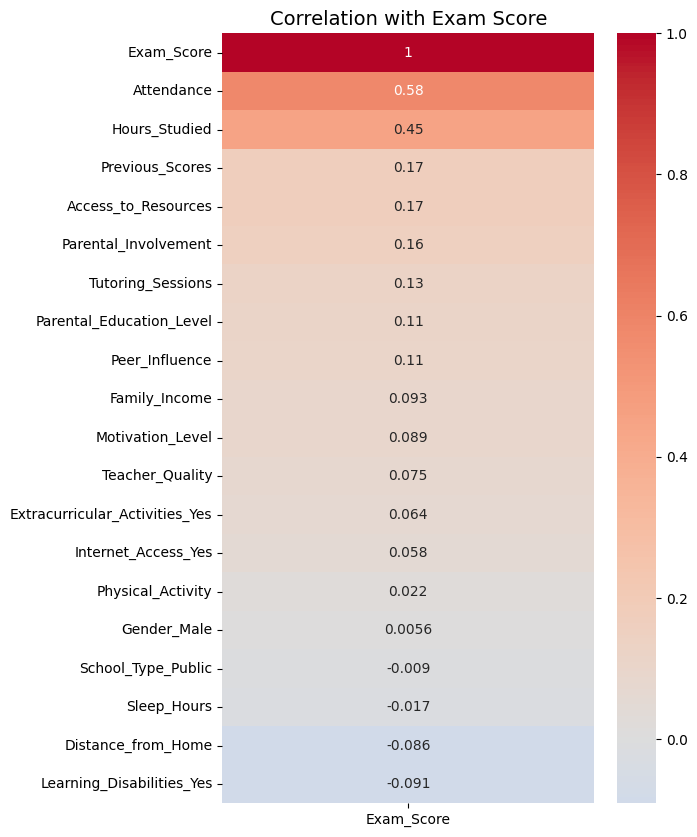

In [319]:
corr_score = corr['Exam_Score'].sort_values(ascending=False)

plt.figure(figsize=(6,10))
sns.heatmap(corr_score.to_frame(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title("Correlation with Exam Score", fontsize=14)
plt.show()

In [320]:
X = model_data.drop(columns=['Exam_Score'])
Y = model_data['Exam_Score']

X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Gender_Male,School_Type_Public,Internet_Access_Yes,Extracurricular_Activities_Yes,Learning_Disabilities_Yes
0,23,84,0,2,7,73,0,0,0,1,2,3,0,0,1,1,1,0,0
1,19,64,0,1,8,59,0,2,1,1,0,4,1,1,0,1,1,0,0
2,24,98,1,1,7,91,1,2,1,1,1,4,2,0,1,1,1,1,0
3,29,89,0,1,8,98,1,1,1,1,0,4,0,1,1,1,1,1,0
4,19,92,1,1,6,65,1,3,1,2,1,4,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,7,76,1,1,2,1,2,2,0,0,0,1,1,0,0
6603,23,76,2,1,8,81,1,3,0,2,2,2,0,0,0,1,1,0,0
6604,20,90,1,0,6,65,0,3,0,1,0,2,2,0,0,1,1,1,0
6605,10,86,2,2,6,91,2,2,0,1,2,3,0,2,0,0,1,1,0


In [321]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

X

array([[ 0.375,  0.2  , -1.   , ...,  0.   , -1.   ,  0.   ],
       [-0.125, -0.8  , -1.   , ...,  0.   , -1.   ,  0.   ],
       [ 0.5  ,  0.9  ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.5  ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [-1.25 ,  0.3  ,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [-0.625, -0.65 ,  0.   , ...,  0.   ,  0.   ,  0.   ]],
      shape=(5955, 19))

In [322]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
X_train

array([[ 0.75 ,  0.1  , -1.   , ...,  0.   , -1.   ,  0.   ],
       [ 0.375, -0.4  ,  1.   , ..., -1.   ,  0.   ,  0.   ],
       [ 0.375,  0.9  ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [-0.875,  0.25 , -1.   , ...,  0.   , -1.   ,  0.   ],
       [ 0.625,  0.95 ,  1.   , ..., -1.   , -1.   ,  0.   ],
       [ 0.375,  0.9  ,  1.   , ...,  0.   ,  0.   ,  0.   ]],
      shape=(4466, 19))

In [323]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [324]:
Y_pred = LR.predict(X_test)

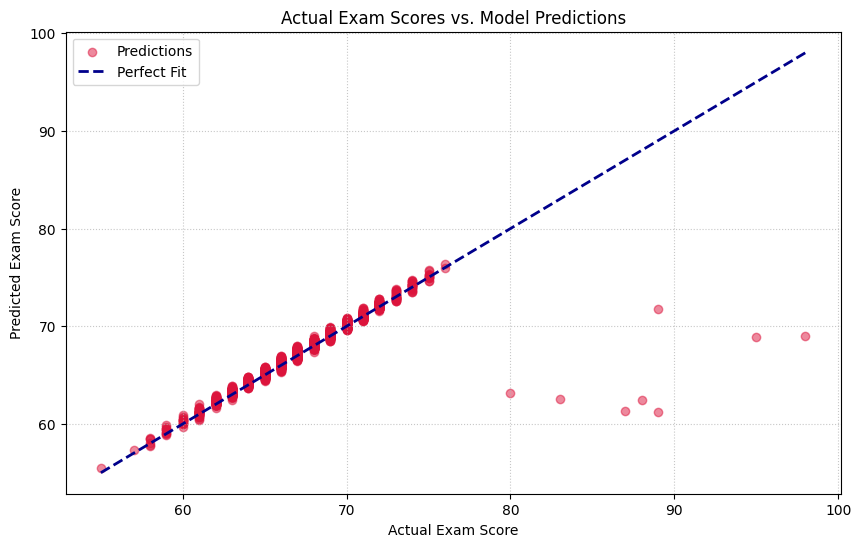

In [325]:
def plot_ml_results(X, y, model):
    y_pred = model.predict(X)
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, color='crimson', alpha=0.5, label='Predictions')
    line_coords = [y.min(), y.max()]
    plt.plot(line_coords, line_coords, color='darkblue', linestyle='--', linewidth=2, label='Perfect Fit')
    
    plt.title('Actual Exam Scores vs. Model Predictions')
    plt.xlabel('Actual Exam Score')
    plt.ylabel('Predicted Exam Score')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()

plot_ml_results(X_test, Y_test, LR)

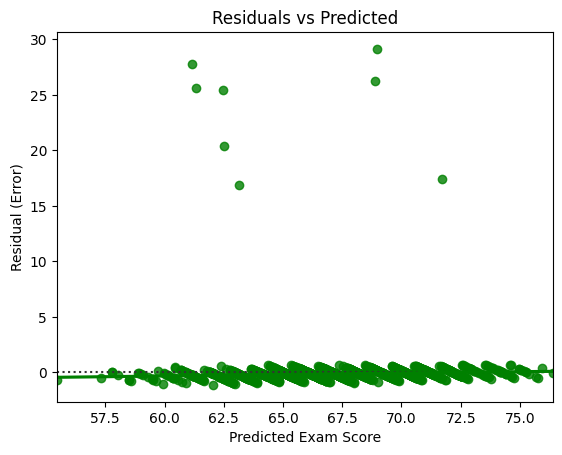

In [326]:
def plot_residuals(model, X, y):
    preds = model.predict(X)
    residuals = y - preds
    sns.residplot(x=preds, y=residuals, lowess=True, color="g")
    plt.title('Residuals vs Predicted')
    plt.xlabel('Predicted Exam Score')
    plt.ylabel('Residual (Error)')
    plt.show()
plot_residuals(LR, X_test, Y_test)

In [327]:
score = r2_score(Y_test, Y_pred)

print("R^2 score:", "{:.0%}".format(score))

R^2 score: 76%


## Some Insights

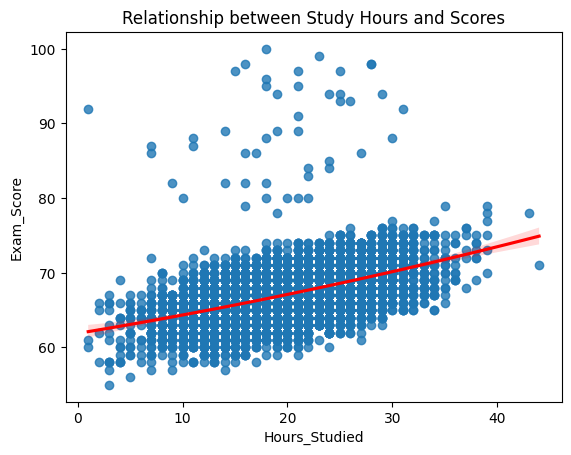

In [328]:
sns.regplot(x='Hours_Studied', y='Exam_Score', data=model_data, order=2, line_kws={'color':'red'})
plt.title('Relationship between Study Hours and Scores')
plt.show()

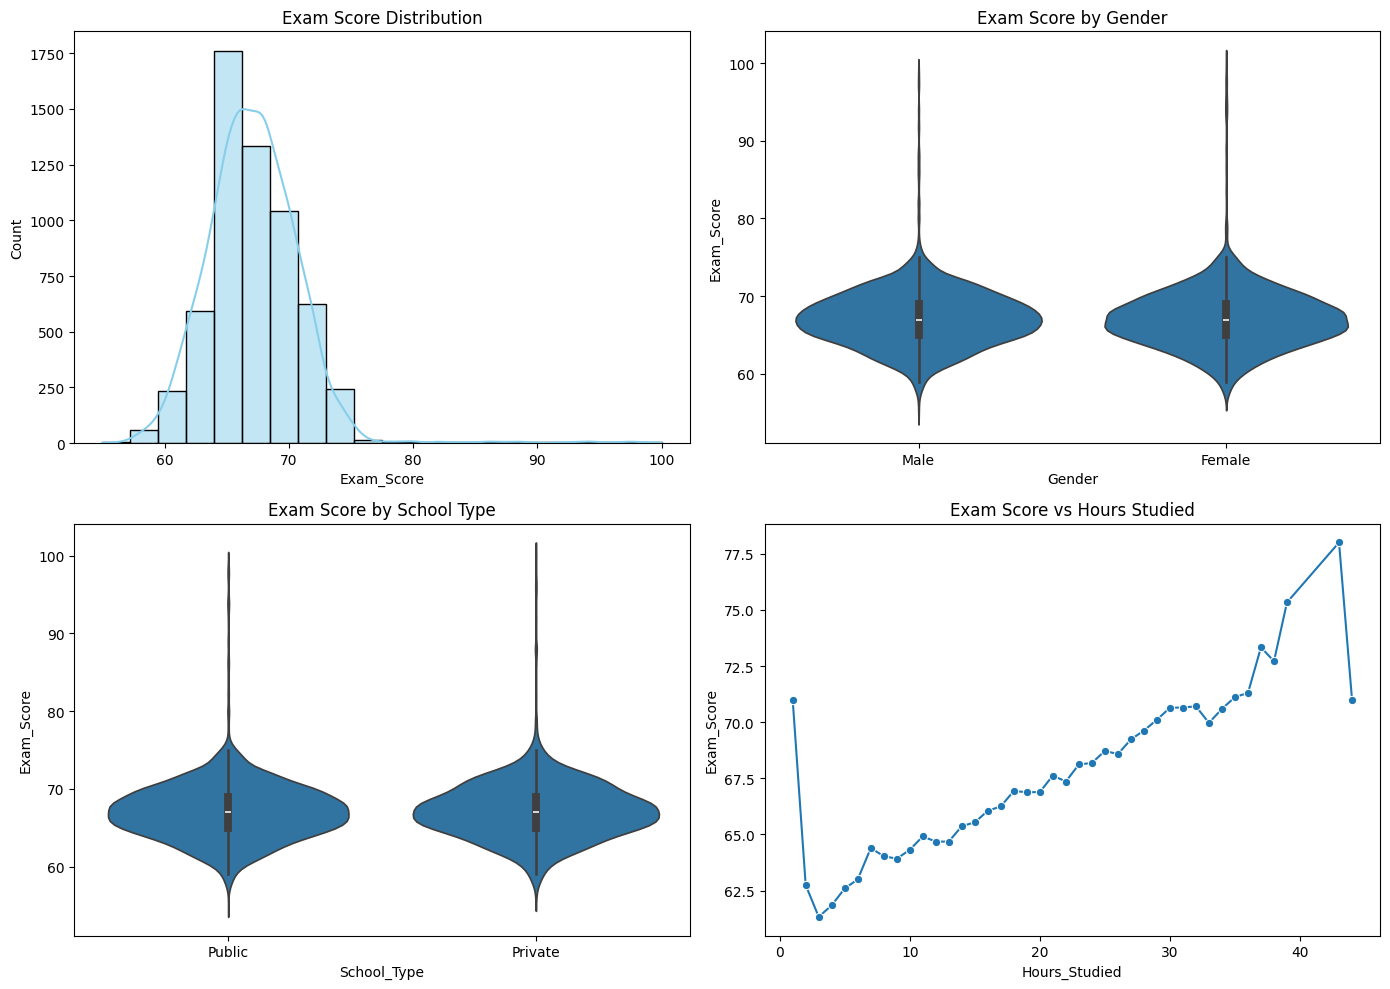

In [329]:
plt.figure(figsize=(14,10))

# Histogram
plt.subplot(2,2,1)
sns.histplot(data["Exam_Score"], bins=20, kde=True, color="skyblue")
plt.title("Exam Score Distribution")

# Boxplot by Gender
plt.subplot(2,2,2)
sns.violinplot(x="Gender", y="Exam_Score", data=data)
plt.title("Exam Score by Gender")

# Boxplot by School Type
plt.subplot(2,2,3)
sns.violinplot(x="School_Type", y="Exam_Score", data=data)
plt.title("Exam Score by School Type")

# Line plot Hours Studied vs Exam Score
plt.subplot(2,2,4)
sns.lineplot(x="Hours_Studied", y="Exam_Score", data=data, errorbar=None, marker="o")
plt.title("Exam Score vs Hours Studied")

plt.tight_layout()
plt.show()
